# Bankruptcy Data Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


In [2]:
path = "/kaggle/input/company-bankruptcy-prediction/data.csv"

df = pd.read_csv(path)
df.shape

(6819, 96)

In [8]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [10]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

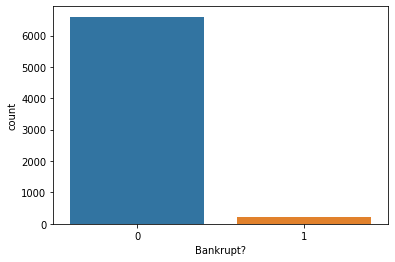

In [13]:
sns.countplot("Bankrupt?", data = df)

Data is greatly unbalanced.

In [4]:
num_features = df.dtypes[df.dtypes != 'int64'].index
cat_features = df.dtypes[df.dtypes == 'int64'].index

df[cat_features].columns.tolist()

['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag']

Exploring Categorical features

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64


<AxesSubplot:xlabel=' Liability-Assets Flag', ylabel='count'>

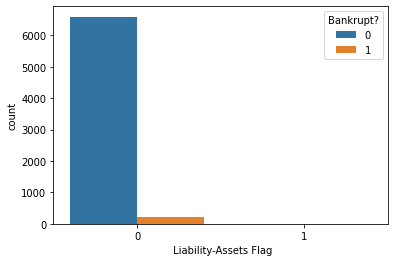

In [18]:
print(df[' Liability-Assets Flag'].value_counts())
sns.countplot(x = ' Liability-Assets Flag', hue = 'Bankrupt?', data = df)

1    6819
Name:  Net Income Flag, dtype: int64


<AxesSubplot:xlabel=' Net Income Flag', ylabel='count'>

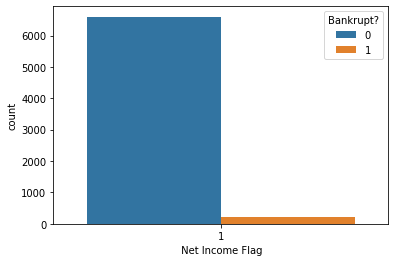

In [19]:
print(df[' Net Income Flag'].value_counts())
sns.countplot(x = ' Net Income Flag', hue = 'Bankrupt?', data = df)

In [5]:
pos_corr = df[num_features].corrwith(df['Bankrupt?']).sort_values(ascending = False)[:6].index.tolist()
neg_corr = df[num_features].corrwith(df['Bankrupt?']).sort_values()[:6].index.tolist()

In [6]:
pos_corr = df[pos_corr + ['Bankrupt?']].copy()
neg_corr = df[neg_corr + ['Bankrupt?']].copy()

In [30]:
def makeBarGraphs(X, y, data):
    
    plt.figure(figsize = (12,8))
    
    for i in range(1,len(y)+1):
        plt.subplot(2,3,i)
        sns.barplot(x = X, y = y[i-1], data = data)
    plt.tight_layout(pad = 1)

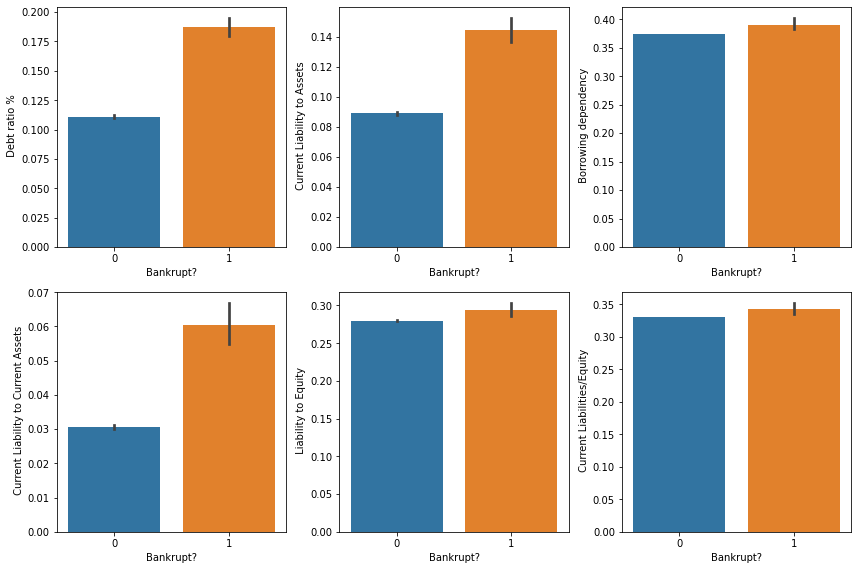

In [36]:
X_pos_corr = df['Bankrupt?']
y_pos_corr = pos_corr.columns.tolist()[:-1]

makeBarGraphs(X_pos_corr, y_pos_corr, df)

"Debt Ratio %", "Current Liability To Assets", and "Current Liability to Current Assets" are higher for Bankrupt institutions

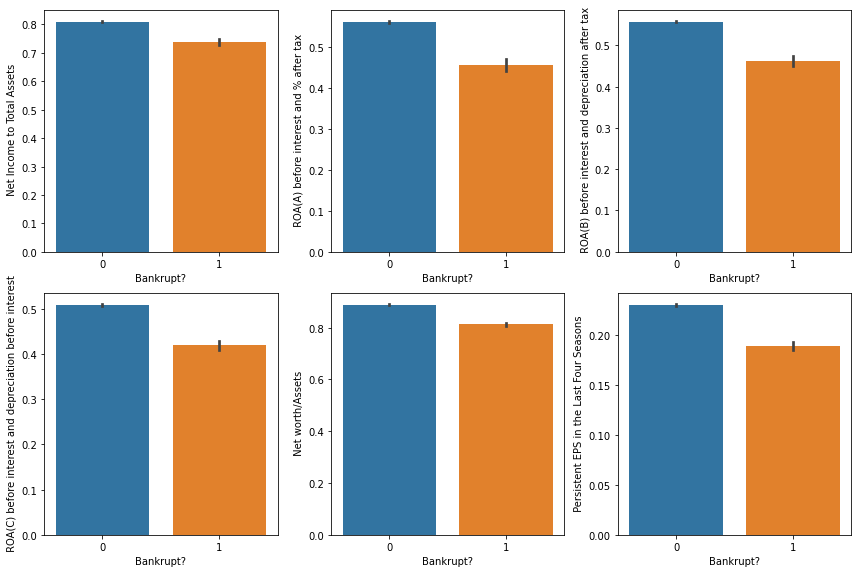

In [37]:
X_neg_corr = df['Bankrupt?']
y_neg_corr = neg_corr.columns.tolist()[:-1]

makeBarGraphs(X_neg_corr, y_neg_corr, df)

Higher Assets indicate lower probability for filling Bankruptcy.

In [42]:
df.columns.sort_values(ascending = True)

Index([' Accounts Receivable Turnover', ' After-tax Net Profit Growth Rate',
       ' After-tax net Interest Rate', ' Allocation rate per person',
       ' Average Collection Days', ' Borrowing dependency', ' CFO to Assets',
       ' Cash Flow Per Share', ' Cash Flow to Equity',
       ' Cash Flow to Liability', ' Cash Flow to Sales',
       ' Cash Flow to Total Assets', ' Cash Reinvestment %',
       ' Cash Turnover Rate', ' Cash flow rate', ' Cash/Current Liability',
       ' Cash/Total Assets', ' Contingent liabilities/Net worth',
       ' Continuous Net Profit Growth Rate',
       ' Continuous interest rate (after tax)', ' Current Asset Turnover Rate',
       ' Current Assets/Total Assets', ' Current Liabilities/Equity',
       ' Current Liabilities/Liability', ' Current Liability to Assets',
       ' Current Liability to Current Assets', ' Current Liability to Equity',
       ' Current Liability to Liability', ' Current Ratio', ' Debt ratio %',
       ' Degree of Financial Leverag

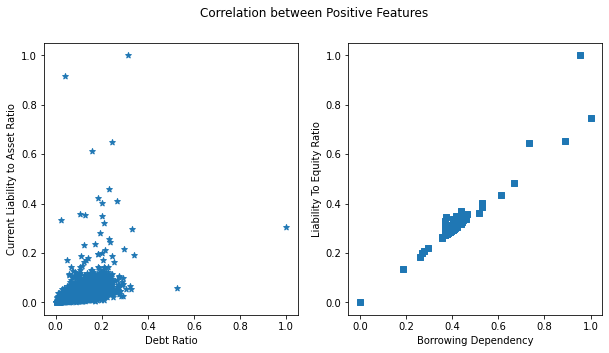

In [62]:
plt.figure(figsize = (10,5))
plt.suptitle("Correlation between Positive Features")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability to Asset Ratio")
plt.scatter(df[" Debt ratio %"], df[" Current Liability to Current Assets"], marker = '*')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(df[" Borrowing dependency"], df[" Liability to Equity"], marker = "s")

Positive correlation features have a positive relation between each other.

<AxesSubplot:xlabel='ROA (B)', ylabel='ROA (C)'>

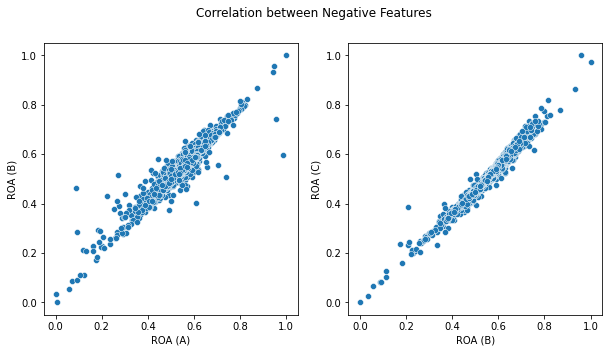

In [63]:
plt.figure(figsize = (10,5))
plt.suptitle("Correlation between Negative Features")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(x = df[" ROA(A) before interest and % after tax"], y = df[" ROA(B) before interest and depreciation after tax"], data = df )

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(x = df[" ROA(B) before interest and depreciation after tax"], y = df[" ROA(C) before interest and depreciation before interest"], data = df)

Negative correlation features have a positive realtion between each other

<AxesSubplot:>

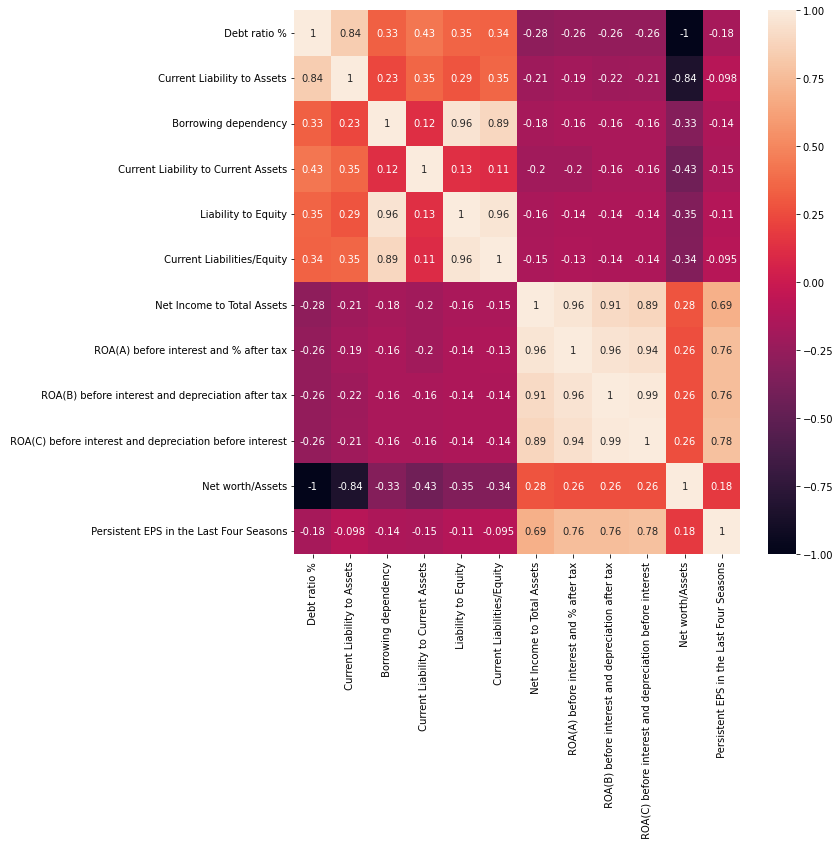

In [65]:
relation = pos_corr.columns.tolist()[:-1] + neg_corr.columns.tolist()[:-1]

plt.figure(figsize = (10,10))
sns.heatmap(df[relation].corr() ,annot = True)

**Normalizing Numerical Features**

In [7]:
df[num_features] = df[num_features].apply(lambda x: (x-x.mean()) / (x.std()))

Data Split

In [12]:
X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**No Feature Selection**

In [14]:
dataModel = pd.DataFrame(columns = ['Algorithms', 'Model Score', 'Precision', 'Recall', 'F1 Score', 'ROC - AUC Score'])

def model_NoFeatureSelection(Parameters, Model, Data, modelName):
    
    Data = df.copy()
    
    X = df.drop("Bankrupt?", axis = 1)
    y = df["Bankrupt?"]
    
    # 80% and 20% Split
    X_train , X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 0)
    
    SKF = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)
    
    for train_index, test_index in SKF.split(X_train, y_train):
        skf_X_train, skf_X_test = X.iloc[train_index], X.iloc[test_index]
        skf_y_train, skf_y_test = y.iloc[train_index], y.iloc[test_index]
        
    skf_X_train, skf_X_test, skf_y_train, skf_y_test = skf_X_train.values, skf_X_test.values, skf_y_train.values, skf_y_test.values
    
    model_Parameters = Parameters
    
    RSCV_model = RandomizedSearchCV(Model, Parameters, n_iter = 4)
    
    #Identifying best Parameters with RandomizedSearch
    for train, test in SKF.split(skf_X_train, skf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy = 'minority'), RSCV_model)
        fitting_model = pipeline.fit(skf_X_train[train], skf_y_train[train])
        best_Model = RSCV_model.best_estimator_
        
    #Evaluating against 20% Testing Data
    print("/n Model Evaluation")
    
    sm = SMOTE(sampling_strategy = 'minority', random_state = 0)
    sm_X_train, sm_y_train = sm.fit_resample(skf_X_train, skf_y_train)
    
    print("/n Random Model Evaluation")
    
    final_Model_sm = RSCV_model.best_estimator_
    final_Model_sm.fit(sm_X_train, sm_y_train)
    
    prediction = final_Model_sm.predict(X_test)
    
    print(classification_report(y_test, prediction))
    
    model = {}
    
    model['Algorithm'] = modelName
    model['Model Score'] = accuracy_score(y_test, prediction)
    model['Precision'] = precision_score(y_test, prediction)
    model['Recall'] = recall_score(y_test, prediction)
    model['F1 Score'] = f1_score(y_test, prediction)
    model['ROC - AUC Score'] = roc_auc_score(y_test, prediction)
    
    return model
    

**K Nearest Neighbors**

In [86]:
KNN_Model = model_NoFeatureSelection( {"n_neighbors" : list(range(2,5,1)), 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] }, KNeighborsClassifier(),
                                       df, "K Nearest Neighbor")

/n Model Evaluation
/n Random Model Evaluation


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1318
           1       0.70      0.91      0.79        46

    accuracy                           0.98      1364
   macro avg       0.85      0.95      0.89      1364
weighted avg       0.99      0.98      0.98      1364



In [89]:
dataModel = dataModel.append(KNN_Model, ignore_index = True)

**Logistic Regression**

In [92]:
LR_Model = model_NoFeatureSelection( {"penalty" : ['l2'], 'C' : [ 0.001, 0.01, 0.1, 1, 10, 100, 1000] }, LogisticRegression(solver = 'liblinear'),
                                       df, "Logistic Regression")
dataModel = dataModel.append(LR_Model, ignore_index = True)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

/n Model Evaluation
/n Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1318
           1       0.25      0.85      0.39        46

    accuracy                           0.91      1364
   macro avg       0.62      0.88      0.67      1364
weighted avg       0.97      0.91      0.93      1364



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Decision Tree Classifier**

In [93]:
DTC_Model = model_NoFeatureSelection( {"criterion" : ['gini', 'entropy'], 'max_depth' : list(range(2,4,1)), 'min_samples_leaf' : list(range(5,7,1))}
                                     , DecisionTreeClassifier(), df, "Decision Tree Classifier")
dataModel = dataModel.append(DTC_Model, ignore_index = True)

/n Model Evaluation
/n Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1318
           1       0.17      0.91      0.29        46

    accuracy                           0.85      1364
   macro avg       0.58      0.88      0.60      1364
weighted avg       0.97      0.85      0.89      1364



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Random Forest Classifier**

In [94]:
RFC_Model = model_NoFeatureSelection( {"max_depth" : [3,5,10, None], 'n_estimators' : [100,200, 300, 400, 500] },
                                     RandomForestClassifier(),
                                       df, "Random Forest Classifier")
dataModel = dataModel.append(RFC_Model, ignore_index = True)

/n Model Evaluation
/n Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1318
           1       0.82      0.89      0.85        46

    accuracy                           0.99      1364
   macro avg       0.91      0.94      0.92      1364
weighted avg       0.99      0.99      0.99      1364



/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Support Vector Classifier**

In [16]:
SVC_Model = model_NoFeatureSelection( {'C' : [1,10,20], 'kernel' : ['rbf', 'linear',] }, SVC(),
                                       df, "Support Vector Classifier")
dataModel = dataModel.append(SVC_Model, ignore_index = True)

/n Model Evaluation
/n Random Model Evaluation


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1318
           1       0.51      0.91      0.65        46

    accuracy                           0.97      1364
   macro avg       0.75      0.94      0.82      1364
weighted avg       0.98      0.97      0.97      1364



In [19]:
dataModel

,Algorithms,Model Score,Precision,Recall,F1 Score,ROC - AUC Score,Algorithm
0,NaN,0.967009,0.506024,0.913043,0.651163,0.940968,Support Vector Classifier


K Nearest Neighbors and Random Forest Classifiers best performers

**Feature Selection**

In [22]:
FeatureModels = pd.DataFrame(columns = ['Algorithms', 'Model Score', 'Precision', 'Recall', 'F1 Score', 'ROC - AUC Score'])

def model_FeatureSelection(Parameters, Model, Data, modelName):
    
    Data = df.copy()
    
    X = df.drop("Bankrupt?", axis = 1)
    y = df["Bankrupt?"]
    
    SKB = SelectKBest(score_func = f_classif, k = int((Data.shape[1]*85) / 100))
    
    X = SKB.fit_transform(X, y)
    
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    # 80% and 20% Split
    X_train , X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 0)
    
    SKF = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)
    
    for train_index, test_index in SKF.split(X_train, y_train):
        skf_X_train, skf_X_test = X.iloc[train_index], X.iloc[test_index]
        skf_y_train, skf_y_test = y.iloc[train_index], y.iloc[test_index]
        
    skf_X_train, skf_X_test, skf_y_train, skf_y_test = skf_X_train.values, skf_X_test.values, skf_y_train.values, skf_y_test.values
    
    model_Parameters = Parameters
    
    RSCV_model = RandomizedSearchCV(Model, Parameters, n_iter = 4)
    
    #Identifying best Parameters with RandomizedSearch
    for train, test in SKF.split(skf_X_train, skf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy = 'minority'), RSCV_model)
        fitting_model = pipeline.fit(skf_X_train[train], skf_y_train[train])
        best_Model = RSCV_model.best_estimator_
        
    #Evaluating against 20% Testing Data
    print("/n Model Evaluation")
    
    sm = SMOTE(sampling_strategy = 'minority', random_state = 0)
    sm_X_train, sm_y_train = sm.fit_resample(skf_X_train, skf_y_train)
    
    print("/n Random Model Evaluation")
    
    final_Model_sm = RSCV_model.best_estimator_
    final_Model_sm.fit(sm_X_train, sm_y_train)
    
    prediction = final_Model_sm.predict(X_test)
    
    print(classification_report(y_test, prediction))
    
    model = {}
    
    model['Algorithm'] = modelName
    model['Model Score'] = accuracy_score(y_test, prediction)
    model['Precision'] = precision_score(y_test, prediction)
    model['Recall'] = recall_score(y_test, prediction)
    model['F1 Score'] = f1_score(y_test, prediction)
    model['ROC - AUC Score'] = roc_auc_score(y_test, prediction)
    
    return model
    

**Random Forest Classifier**

In [23]:
RFC_F_Model = model_FeatureSelection( {"max_depth" : [3,5,10, None], 'n_estimators' : [100,200, 300, 400, 500] },
                                     RandomForestClassifier(),
                                       df, "Random Forest Classifier")
FeatureModels = dataModel.append(RFC_F_Model, ignore_index = True)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


/n Model Evaluation
/n Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1318
           1       0.27      0.87      0.42        46

    accuracy                           0.92      1364
   macro avg       0.63      0.89      0.69      1364
weighted avg       0.97      0.92      0.94      1364



**K Nearest Neighbors**

In [24]:
KNN_F_Model = model_FeatureSelection( {"n_neighbors" : list(range(2,5,1)), 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'] }, KNeighborsClassifier(),
                                       df, "K Nearest Neighbor")
FeatureModels = dataModel.append(KNN_F_Model, ignore_index = True)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [93] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


/n Model Evaluation
/n Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1318
           1       0.67      0.89      0.77        46

    accuracy                           0.98      1364
   macro avg       0.83      0.94      0.88      1364
weighted avg       0.99      0.98      0.98      1364



In [26]:
FeatureModels.sort_values('F1 Score', ascending = False)

,Algorithms,Model Score,Precision,Recall,F1 Score,ROC - AUC Score,Algorithm
1,NaN,0.981672,0.672131,0.891304,0.766355,0.938065,K Nearest Neighbor
0,NaN,0.967009,0.506024,0.913043,0.651163,0.940968,Support Vector Classifier


# **Feature selection did not result in better resutls!**